In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Instalacion

In [2]:
!pip install numpy -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 76.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2


In [1]:
import numpy as np
print(f'''
numpy -> {np.__version__}
''')


numpy -> 1.26.4



In [2]:
!pip install sklearn -U
!pip install pandas -U
!pip install matplotlib -U
!pip install statsmodels -U


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 91.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-c

In [3]:
import pandas as pd
import numpy as np
import statsmodels as sm

import matplotlib
import scipy
import sklearn

print(f'''
Matplotlib -> {matplotlib.__version__}
pandas -> {pd.__version__}
numpy -> {np.__version__}
scipy -> {scipy.__version__}
statsmodels -> {sm.__version__}
sklearn -> {sklearn.__version__}
''')


Matplotlib -> 3.7.1
pandas -> 2.2.2
numpy -> 1.26.4
scipy -> 1.11.4
statsmodels -> 0.14.2
sklearn -> 1.2.2



# Preprocessing

In [6]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/seriestemp/GlobalLandTemperaturesByMajorCity.csv')

In [7]:
df.head()

dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0  1849-01-01              26.704                          1.435  Abidjan   
1  1849-02-01              27.434                          1.362  Abidjan   
2  1849-03-01              28.101                          1.612  Abidjan   
3  1849-04-01              26.140                          1.387  Abidjan   
4  1849-05-01              25.427                          1.200  Abidjan   

         Country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W  
3  Côte D'Ivoire    5.63N     3.23W  
4  Côte D'Ivoire    5.63N     3.23W

In [8]:
#Quedarnos solo con los casos de Madrid
madrid = df[df["City"] == "Madrid"]
madrid.head()

dt  AverageTemperature  AverageTemperatureUncertainty    City  \
138329  1743-11-01               6.652                          2.015  Madrid   
138330  1743-12-01                 NaN                            NaN  Madrid   
138331  1744-01-01                 NaN                            NaN  Madrid   
138332  1744-02-01                 NaN                            NaN  Madrid   
138333  1744-03-01                 NaN                            NaN  Madrid   

       Country Latitude Longitude  
138329   Spain   40.99N     4.26W  
138330   Spain   40.99N     4.26W  
138331   Spain   40.99N     4.26W  
138332   Spain   40.99N     4.26W  
138333   Spain   40.99N     4.26W

In [9]:
madrid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3239 entries, 138329 to 141567
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             3239 non-null   object 
 1   AverageTemperature             3166 non-null   float64
 2   AverageTemperatureUncertainty  3166 non-null   float64
 3   City                           3239 non-null   object 
 4   Country                        3239 non-null   object 
 5   Latitude                       3239 non-null   object 
 6   Longitude                      3239 non-null   object 
dtypes: float64(2), object(5)
memory usage: 331.5+ KB


In [10]:
#Cambiar el tipo de dt de object a datetime
madrid['dt'] = pd.to_datetime(df['dt'], format='%Y-%m-%d')

<ipython-input-10-43288bdedbfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid['dt'] = pd.to_datetime(df['dt'], format='%Y-%m-%d')


In [11]:
madrid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3239 entries, 138329 to 141567
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             3239 non-null   datetime64[ns]
 1   AverageTemperature             3166 non-null   float64       
 2   AverageTemperatureUncertainty  3166 non-null   float64       
 3   City                           3239 non-null   object        
 4   Country                        3239 non-null   object        
 5   Latitude                       3239 non-null   object        
 6   Longitude                      3239 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 331.5+ KB


In [12]:
#Poner las fechas como indice
mad = madrid.set_index('dt')
mad.index.freq = 'MS'
#Seleccionar unicamente las temperaturas ya que las demas columnas son irrelevantes
mad = mad[['AverageTemperature']]
mad.head()

AverageTemperature
dt                            
1743-11-01               6.652
1743-12-01                 NaN
1744-01-01                 NaN
1744-02-01                 NaN
1744-03-01                 NaN

In [13]:
mad.shape

(3239, 1)

In [14]:
mad.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3239 entries, 1743-11-01 to 2013-09-01
Freq: MS
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AverageTemperature  3166 non-null   float64
dtypes: float64(1)
memory usage: 50.6 KB


In [15]:
#Comprobamos si tienen algo que ver las observaciones nulas
mad[mad.AverageTemperature.isna()].index

DatetimeIndex(['1743-12-01', '1744-01-01', '1744-02-01', '1744-03-01',
               '1744-08-01', '1745-05-01', '1745-06-01', '1745-07-01',
               '1745-08-01', '1745-09-01', '1745-10-01', '1745-11-01',
               '1745-12-01', '1746-01-01', '1746-02-01', '1746-03-01',
               '1746-04-01', '1746-05-01', '1746-06-01', '1746-07-01',
               '1746-08-01', '1746-09-01', '1746-10-01', '1746-11-01',
               '1746-12-01', '1747-01-01', '1747-02-01', '1747-03-01',
               '1747-04-01', '1747-05-01', '1747-06-01', '1747-07-01',
               '1747-08-01', '1747-09-01', '1747-10-01', '1747-11-01',
               '1747-12-01', '1748-01-01', '1748-02-01', '1748-03-01',
               '1748-04-01', '1748-05-01', '1748-06-01', '1748-07-01',
               '1748-08-01', '1748-09-01', '1748-10-01', '1748-11-01',
               '1748-12-01', '1749-01-01', '1749-02-01', '1749-03-01',
               '1749-04-01', '1749-05-01', '1749-06-01', '1749-07-01',
      

In [16]:
mad[mad.index > '1745-03-02'].head(40)

AverageTemperature
dt                            
1745-04-01               9.393
1745-05-01                 NaN
1745-06-01                 NaN
1745-07-01                 NaN
1745-08-01                 NaN
1745-09-01                 NaN
1745-10-01                 NaN
1745-11-01                 NaN
1745-12-01                 NaN
1746-01-01                 NaN
1746-02-01                 NaN
1746-03-01                 NaN
1746-04-01                 NaN
1746-05-01                 NaN
1746-06-01                 NaN
1746-07-01                 NaN
1746-08-01                 NaN
1746-09-01                 NaN
1746-10-01                 NaN
1746-11-01                 NaN
1746-12-01                 NaN
1747-01-01                 NaN
1747-02-01                 NaN
1747-03-01                 NaN
1747-04-01                 NaN
1747-05-01                 NaN
1747-06-01                 NaN
1747-07-01                 NaN
1747-08-01                 NaN
1747-09-01                 NaN
1747-10-01                 NaN
1747-11-01                 NaN
1747-12-01                 NaN
1748-01-01                 NaN
1748-02-01                 NaN
1748-03-01                 NaN
1748-04-01                 NaN
1748-05-01                 NaN
1748-06-01                 NaN
1748-07-01                 NaN

He hecho esto para ver si las fechas que tienen valores nulos tenian algo que ver unas con otras. Y efectivamente, desde el 1745 hasta el 1749 no hay ni un solo valor util. Y habiendo solo 1 valor al mes usar un imputer no serviria de nada porque estariamos imputando 40 valores ficticios seguidos. Por eso creo que lo mejor es eliminar todas las observaciones de antes del 1750 y los pocos valores nulos que quedan usar un imputer para eliminar del todo los nulos

In [17]:
# Mask para eliminar todos los elementos previos al 1750
mad = mad[mad.index > '1749-12-02']
print(mad.shape)
mad.info()

(3165, 1)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3165 entries, 1750-01-01 to 2013-09-01
Freq: MS
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AverageTemperature  3153 non-null   float64
dtypes: float64(1)
memory usage: 49.5 KB


In [18]:
#Eliminamos los NaNs con un interpolate
mad = mad.interpolate()
mad.head()

AverageTemperature
dt                            
1750-01-01               3.069
1750-02-01               5.838
1750-03-01               8.308
1750-04-01               9.278
1750-05-01              13.643

A la hora de determinar outliers es obvio que hay un alto grado de estacionalidad, ya que la temperatura depende de los meses del año principalmente

In [19]:
import numpy as np
#Deteccion de outliers segun IQR
def iqr_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    IQR = q3 - q1
    lower_fence = q1 - (1.5 * IQR)
    upper_fence = q3 + (1.5 * IQR)
    return data[(data.AverageTemperature > upper_fence) | (data.AverageTemperature < lower_fence)]

outliers = iqr_outliers(mad)
print(outliers)

Empty DataFrame
Columns: [AverageTemperature]
Index: []


Segun IQR no hay outliers

In [20]:
import scipy.stats as stats

#Deteccion de outliers segun zscore
def modified_zscore(df, degree=3):
    data = df.copy()
    s = stats.norm.ppf(0.75)
    numerator = s*(data - data.median())
    MAD = np.abs(data - data.median()).median()
    data['m_zscore'] = numerator/MAD
    outliers = data[(data['m_zscore'] > degree) | (data['m_zscore'] < -degree)]

    return outliers, data

threshold =  3
outliers, transformed = modified_zscore(mad, threshold)
print(outliers)

Empty DataFrame
Columns: [AverageTemperature, m_zscore]
Index: []


Segun modified Zscore no hay outliers tampoco, asi que considero que no hay outliers y continuo con el dataset como lo tenemos

In [21]:
mad.head()

AverageTemperature
dt                            
1750-01-01               3.069
1750-02-01               5.838
1750-03-01               8.308
1750-04-01               9.278
1750-05-01              13.643

In [22]:
from sklearn.model_selection import train_test_split

mad_train, mad_test = train_test_split(mad, train_size=0.8, shuffle=False)

# Baseline

Esta claro que necesitamos un modelo que tenga en cuenta la estacionalidad, por eso vamos a probar directamente un SARIMA


### Import de funciones utiles y librerias

In [85]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import warnings

from statsmodels.tsa.api import (kpss, adfuller,
                                 seasonal_decompose, STL)
from statsmodels.tools.eval_measures import rmspe, rmse
from sklearn.metrics import mean_absolute_percentage_error as mape
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product
import statsmodels as sm
from pathlib import Path


warnings.filterwarnings('ignore')

###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [12, 5]   ##
#plt.rcParams['figure.dpi'] = 100          ## use 300 for printing
plt.rc('font', size=8)                     ##
plt.rc('axes', titlesize=14)               ##
plt.rc('axes', labelsize=14)               ##
plt.rc('xtick', labelsize=10)              ##
plt.rc('ytick', labelsize=10)              ##
plt.rc('legend', fontsize=10)              ##
plt.rc('figure', titlesize=12)             ##
#############################################

def combinator(items, r=1):
    combo = [i for i in product(*items, repeat=r)]
    return combo


In [86]:
def get_best_model(score, c='AIC'):
    initial_score = score[0][c]
    best_model = 0
    for k,v in score.items():
        if v[c] < initial_score:
            initial_score = v[c]
            best_model = k
    print(f'Best model: {best_model} with lowest {c} score: {initial_score}')
    return score[best_model]['model']

In [87]:
def plot_forecast(model, start, train, test):
    forecast = pd.DataFrame(model.forecast(test.shape[0]),
                            index=test.index)
    ax = train.loc[start:].plot(style='--')
    test.plot(ax=ax)
    forecast.plot(ax=ax, style = '-.')
    ax.legend(['orig_train', 'orig_test', 'forecast'])
    # plt.show()
    return ax

### Busqueda del mejor SARIMA

In [100]:
from sklearn.model_selection import train_test_split

mad_train, mad_test = train_test_split(mad, train_size=0.8, shuffle=False)

In [106]:
from sktime.forecasting.all import mean_absolute_scaled_error as mase

In [108]:
%%time
P_ns, D_ns, Q_ns = [list(range(3))]*3
P_s, D_s, Q_s = [list(range(2))]*3

vals = combinator([P_ns, D_ns, Q_ns, P_s, D_s, Q_s])
score = {}
for i, (p, d, q, P, D, Q) in enumerate(vals):
    if i%15 == 0:
        print(f'Running model #{i} using SARIMA({p},{d},{q})({P},{D},{Q},12)')
    m = SARIMAX(mad_train,
                order=(p,d,q),
                seasonal_order=(P, D, Q, 12),
                enforce_stationarity=False)
    res = m.fit(disp=0)
    y = mad_test.values.ravel()
    y_hat = res.forecast(steps=len(y))
    score[i] = {'non-seasonal order': (p,d,q),
                'seasonal order': (P, D, Q),
                'AIC':res.aic,
                'AICc': res.aicc,
                'BIC': res.bic,
                'RMSPE': rmspe(y, y_hat),
                'RMSE' : rmse(y, y_hat),
                'MAPE' : mape(y, y_hat),
                'MASE' : mase(y, y_hat, y_train = mad_train.values.ravel()),
                'model': res}

In [114]:
best_model_sarima = get_best_model(score, 'AIC')

In [115]:
score[115]

{'non-seasonal order': (1, 1, 2),
 'seasonal order': (0, 1, 1),
 'AIC': 8214.8327999469,
 'AICc': 8214.856819162273,
 'BIC': 8243.961023608,
 'RMSPE': 2.781386042642391,
 'RMSE': 1.4911909611491805,
 'MAPE': 0.14724710895396978,
 'MASE': 0.3622105711489682,
 'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x7f94766ba140>}

El mejor SARIMA tiene (1,1,2)(0,1,1,12)

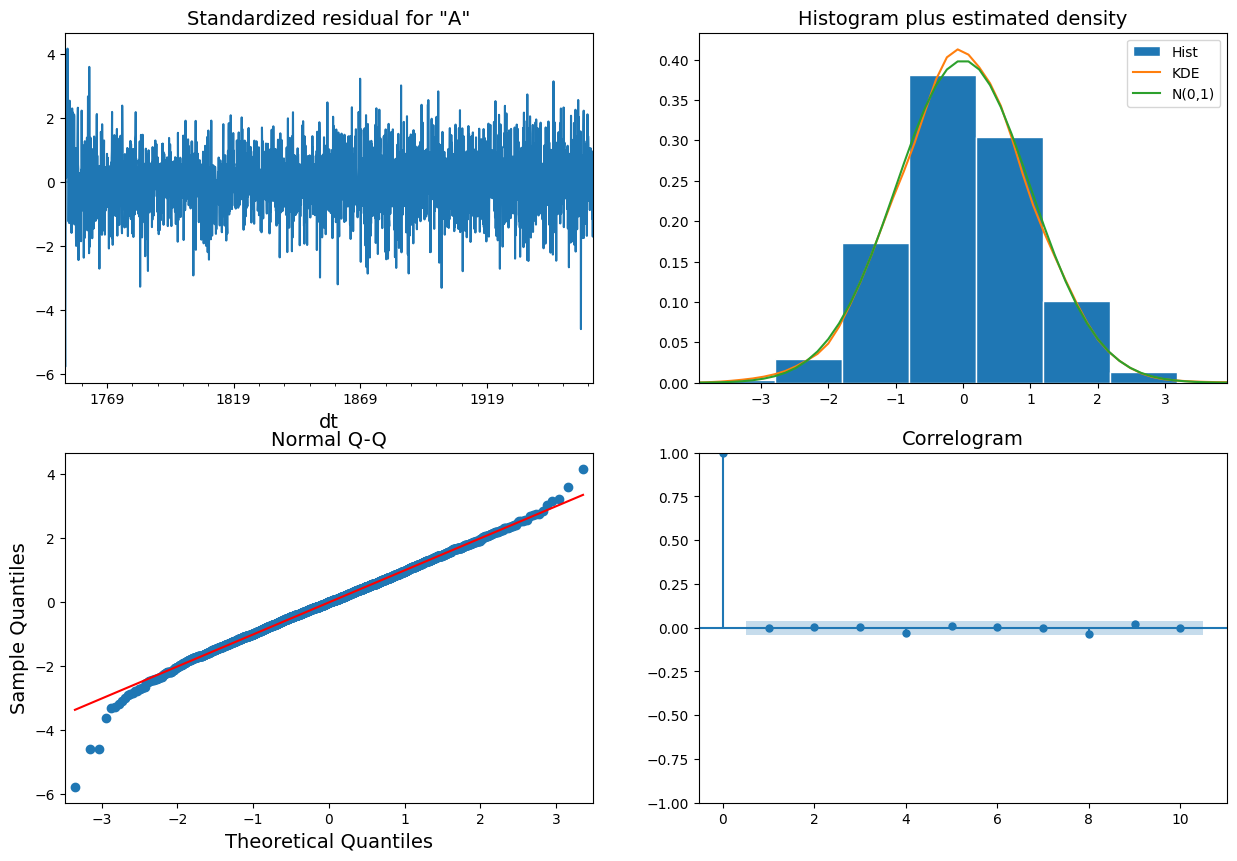

In [104]:
best_model_sarima.plot_diagnostics(figsize=(15,10))
plt.show()

Los residuales tienen que tener media 0 y varianza constantes en el grafico de residuales estandarizados para A

Los residuales tienen que seguir una distribucion normal en el histograma sumada la densidad estimada

Los residuales tienen que alinearse sobre la linea de Normal Q-Q plot

Los residuales tienen que en el correlograma tender a 0, excepto en el instante inicial




Como se puede ver en los 4 graficos este modelo cumple con todos los requisitos de un buen modelo SARIMA, y esto tiene sentido una vez se realiza el forecasting ya que se aproxima bastante a la realidad

<Axes: xlabel='dt'>

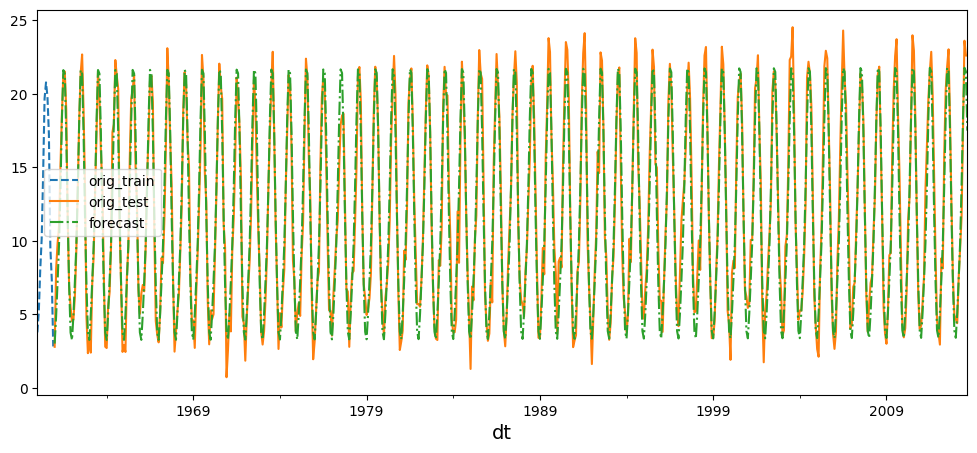

In [105]:
plot_forecast(best_model_sarima, '1960', mad_train, mad_test)


### El mejor Modelo Sarima es:

In [95]:
sarima_model = SARIMAX(mad_train,
                       order=(1,1,2),
                       seasonal_order=(0,1,1,12))
results = sarima_model.fit(disp=0)

Con un 0.3622 de MASE

# Machine learning

### Imports

In [33]:
!pip install -U sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.1/130.1 kB 18.6 MB/s eta 0:00:00


In [34]:

from sklearn.ensemble import (RandomForestRegressor,
                              GradientBoostingRegressor,
                              ExtraTreesRegressor)


from sklearn.linear_model import( LinearRegression,
                                 ElasticNet,
                                 Ridge,
                                 Lasso,
                                 HuberRegressor)
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.all import (
        Deseasonalizer, Detrender,
        temporal_train_test_split,
        mean_absolute_percentage_error as mape,
        mean_squared_percentage_error as mspe,
        mean_squared_error as mse,
        mean_absolute_scaled_error as mase,
        ForecastingHorizon,
        NaiveForecaster,
        TransformedTargetForecaster,
        PolynomialTrendForecaster
)
from sktime.forecasting.compose import make_reduction
from xgboost import XGBRegressor


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

### 1º Approach: Probar creando numerosas columnas con propagacion de valores

In [141]:
from sklearn.model_selection import train_test_split

mad_train, mad_test = train_test_split(mad, train_size=0.8, shuffle=False)

In [ ]:
#Funcion para crear la propagacion de los valores
def one_step_forecast(df, window):
    d = df.values
    x = []
    n = len(df)
    idx = df.index[:-window]
    for start in range(n-window):
        end = start + window
        x.append(d[start:end])
    cols = [f'x_{i}' for i in range(1, window+1)]
    x = np.array(x).reshape(n-window, -1)
    y = df.iloc[window:].values
    df_xs = pd.DataFrame(x, columns=cols, index=idx)
    df_y = pd.DataFrame(y.reshape(-1), columns=['y'], index=idx)
    return pd.concat([df_xs, df_y], axis=1).dropna()


In [140]:
from statsmodels.graphics.tsaplots import plot_acf
def plot_results(cols, results, data_name):
    for row in results[cols].iterrows():
        yhat, resid, actual, name = row[1]
        plt.title(f'{data_name} - {name}')
        plt.plot(actual, 'k--', alpha=0.5)
        plt.plot(yhat, 'k')
        plt.legend(['actual', 'forecast'])
        plot_acf(resid, zero=False,
                 title=f'{data_name} - Autocorrelation')
        plt.show()

In [142]:
mad_train_one = one_step_forecast(mad_train, 10)
mad_test_one = one_step_forecast(mad_test, 10)

# Aplicar un standard scaler sobre las columnas de entrenamiento
from sklearn.preprocessing import StandardScaler

#Guardar el target y para añadirlo posterior al escalado
y_train = mad_train_one['y'].reset_index().y
y_test = mad_test_one['y'].reset_index().y

# Fit el scaler con las variables independientes
scaler = StandardScaler()
scaler.fit(mad_train_one.drop(columns=['y']))

# Transformar los datasets
mad_train_sc = pd.DataFrame(scaler.transform(mad_train_one.drop(columns=['y'])), columns=mad_train_one.columns[:-1])
mad_test_sc = pd.DataFrame(scaler.transform(mad_test_one.drop(columns=['y'])), columns=mad_test_one.columns[:-1])

# Añadir de nuevo el target y
mad_train_sc['y'] = y_train
mad_test_sc['y'] = y_test


In [143]:
#Funcion para entrenar un modelo
def train_model(train, test, regressor, reg_name):
    X_train, y_train  = train.drop(columns=['y']), train['y']
    X_test, y_test  = test.drop(columns=['y']), test['y']

    print(f'training {reg_name} ...')

    regressor.fit(X_train, y_train)

    yhat = regressor.predict(X_test)
    rmse_test = np.sqrt(mse(y_test, yhat))
    mape_test = mape(y_test, yhat)
    mase_test = mase(y_test, yhat, y_train=y_train)
    residuals = y_test.values - yhat

    model_metadata = {
        'Model Name': reg_name, 'Model': regressor,
        'RMSE': rmse_test, 'MAPE': mape_test, 'MASE': mase_test,
        'yhat': yhat, 'resid': residuals, 'actual': y_test.values}

    return model_metadata

In [144]:
#Funcion para entrenar diversos modelos
def train_different_models(train, test, regressors):
    results = []
    for reg_name, regressor in regressors.items():
        results.append(train_model(train,
                                   test,
                                   regressor,
                                   reg_name))
    return results

In [145]:
#Lista de diversos regressors diferentes
regressors = {
            'Ridge Regression': Ridge(0.5, fit_intercept=False),
            'Huber Regression': HuberRegressor(fit_intercept=False),
            'Linear Regression': LinearRegression(),
            'K-NN Regressor': KNeighborsRegressor(n_neighbors=5),
            'Extra Tree Regressor': ExtraTreesRegressor(),
            'Random Forest Regressor': RandomForestRegressor(),
            'Gradient Boosting Regressor': GradientBoostingRegressor(),
            'XGBoost': XGBRegressor()
            }

recipe2_results = train_different_models(mad_train_sc, mad_test_sc, regressors)


### Evaluacion primer approach

In [146]:
cols = ['Model Name', 'RMSE', 'MAPE', 'MASE']
recipe2_results = pd.DataFrame(recipe2_results)
recipe2_results[cols].sort_values('MASE')

Model Name       RMSE      MAPE      MASE
3               K-NN Regressor   1.595561  0.153848  0.391169
4         Extra Tree Regressor   1.626054  0.152406  0.392457
5      Random Forest Regressor   1.690341  0.158411  0.405806
6  Gradient Boosting Regressor   1.787435  0.162554  0.431009
7                      XGBoost   1.783467  0.173665  0.431010
2            Linear Regression   1.925274  0.188481  0.473851
1             Huber Regression  12.163859  1.488739  3.694225
0             Ridge Regression  12.166361  1.488892  3.695005

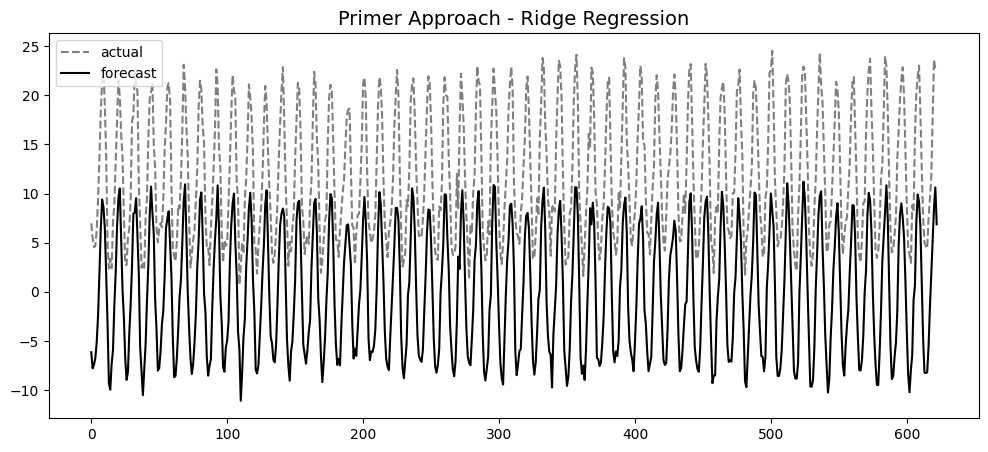

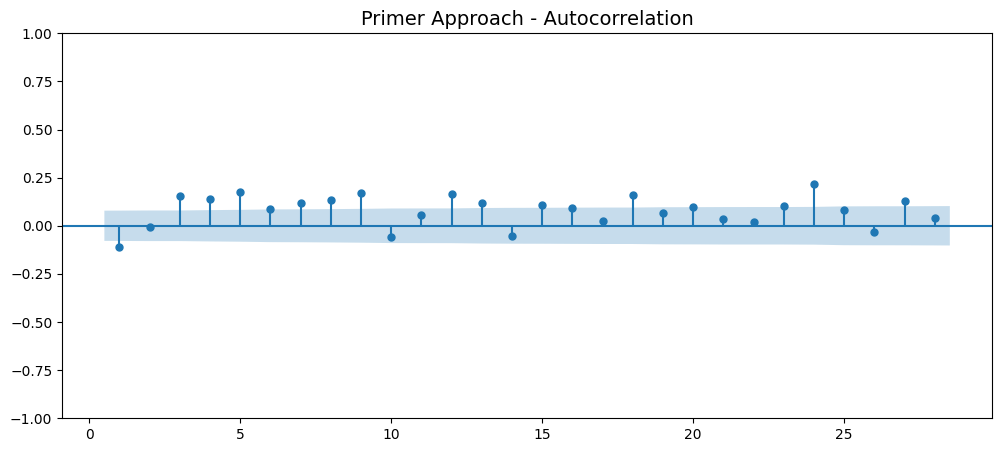

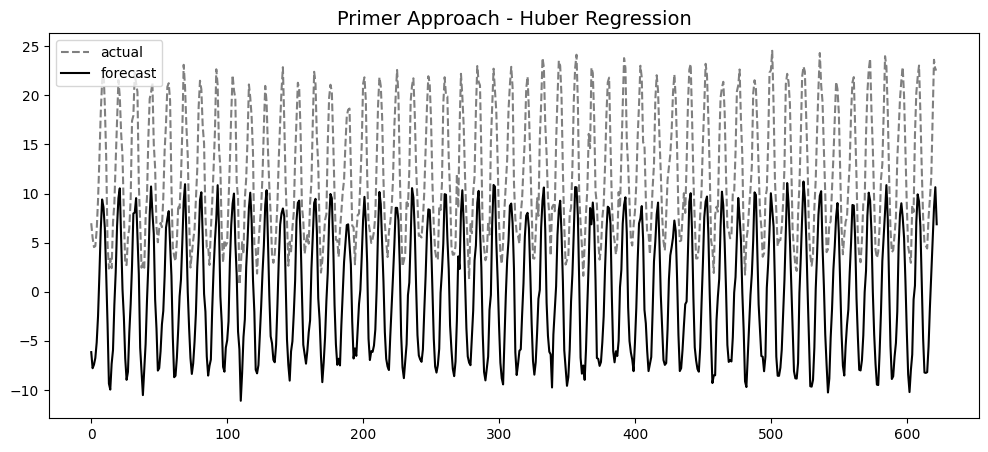

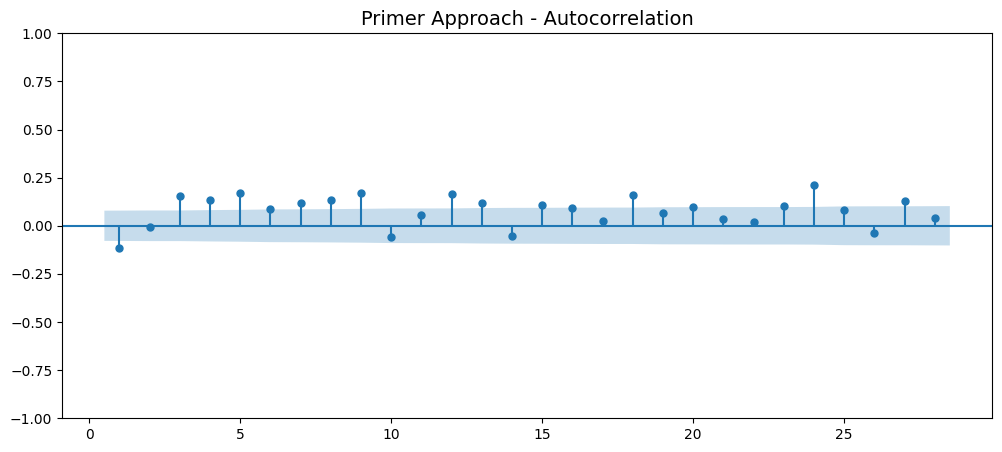

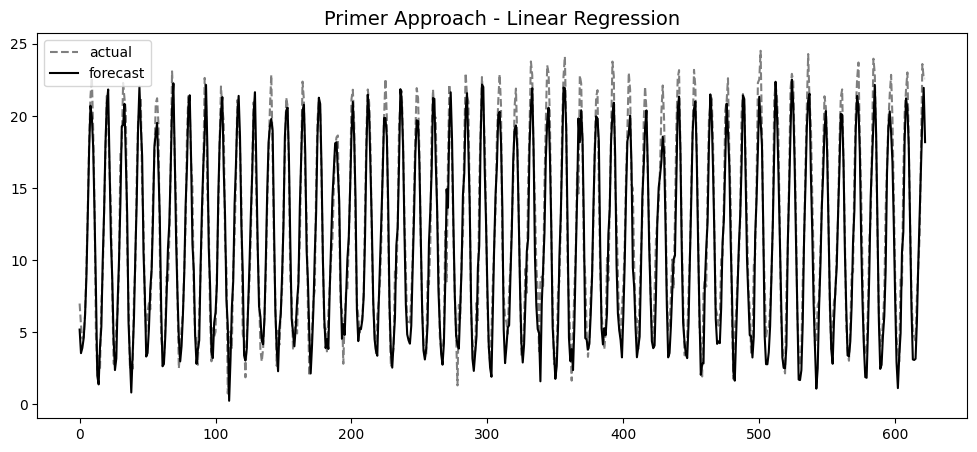

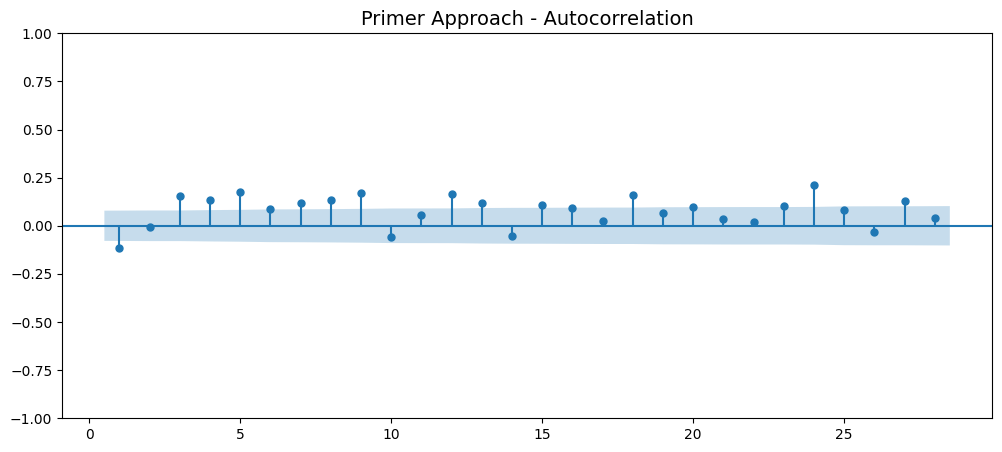

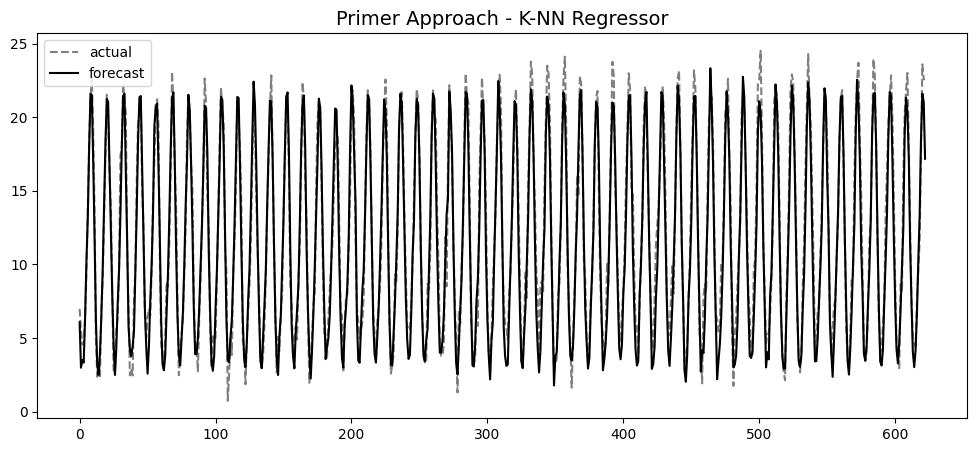

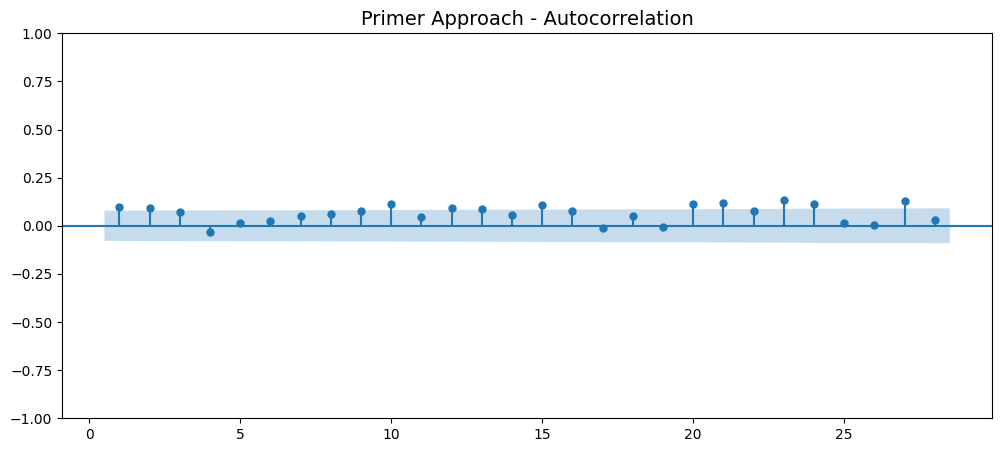

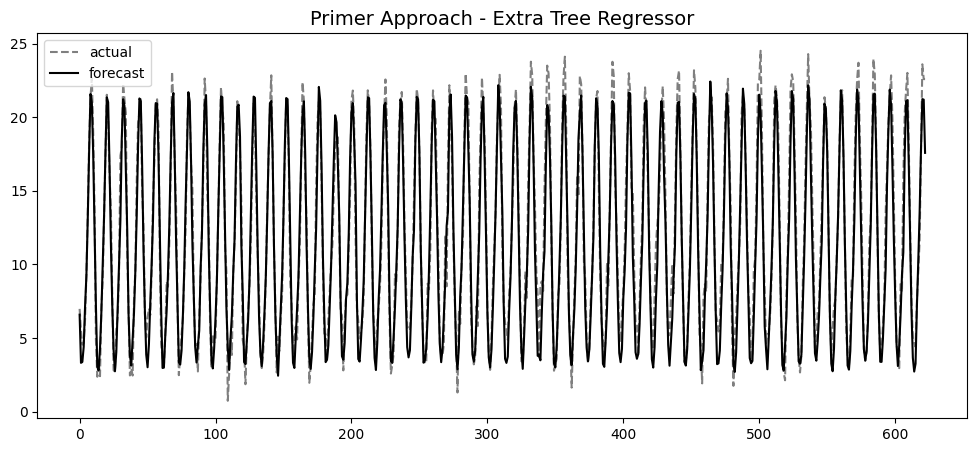

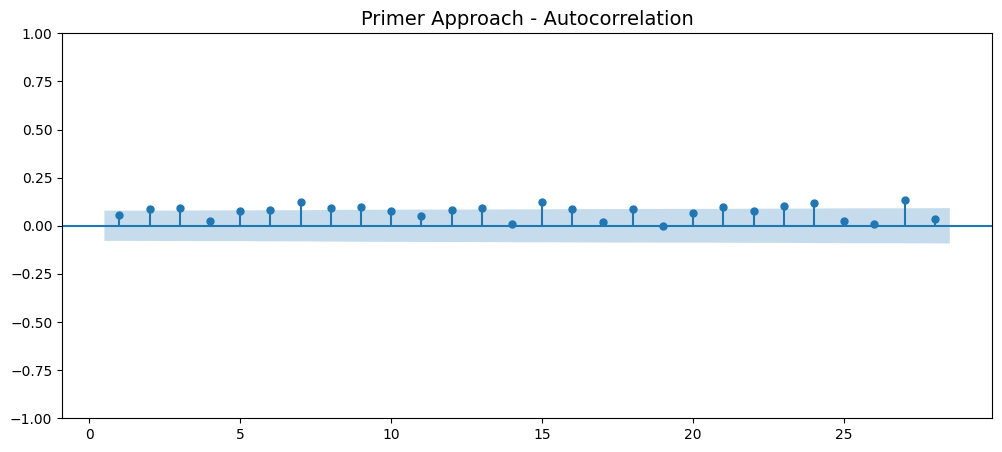

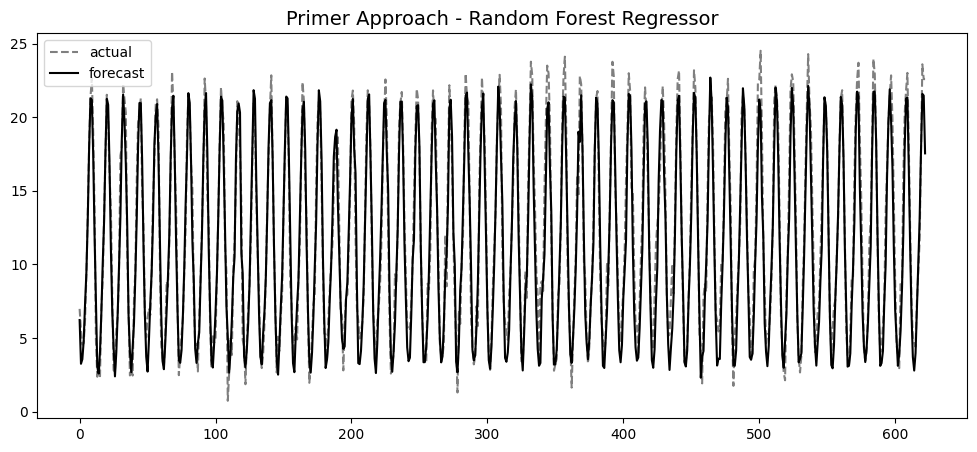

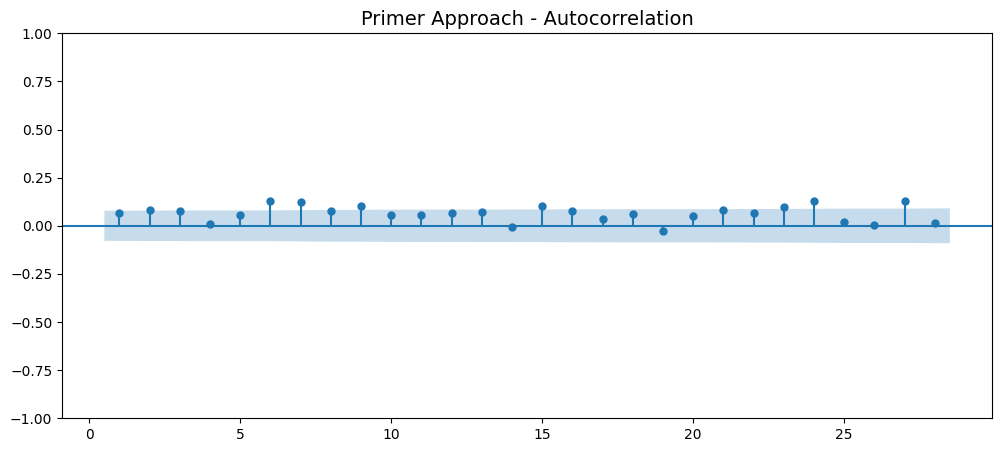

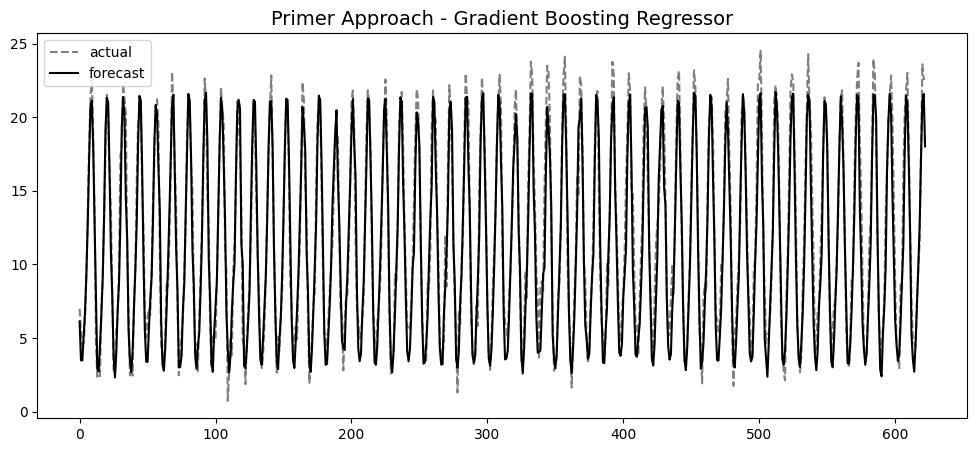

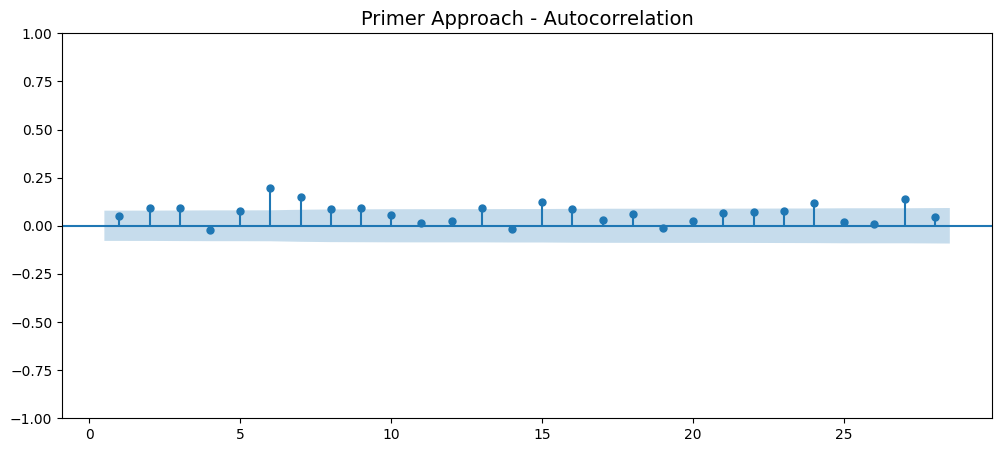

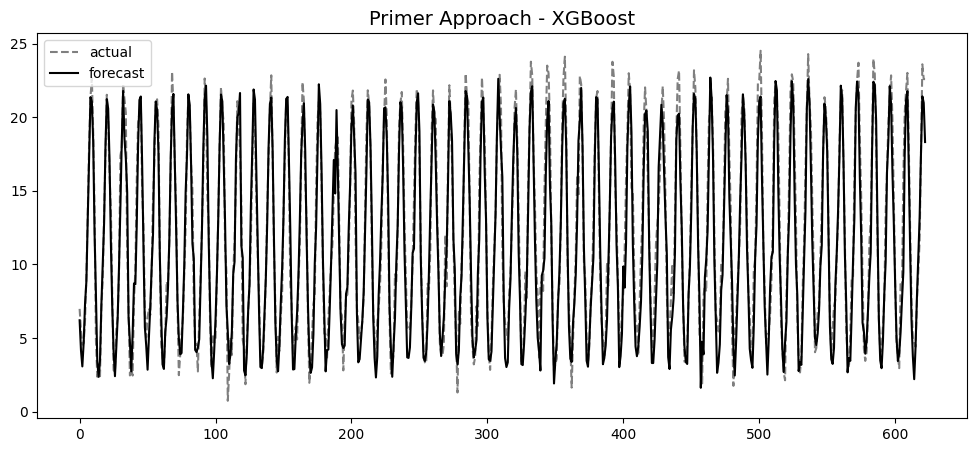

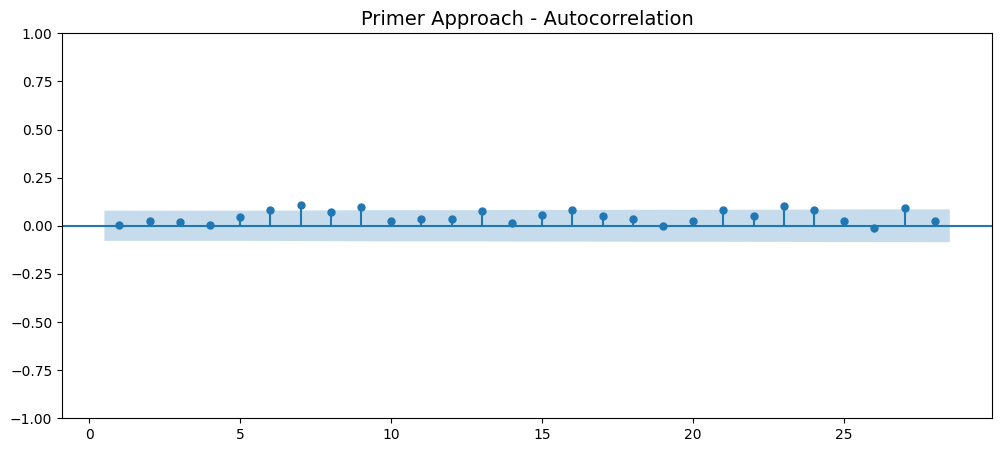

In [147]:
cols = ['yhat', 'resid', 'actual', 'Model Name']
plot_results(cols, recipe2_results, 'Primer Approach')

### 2º Approach: Probar introduciendo el mes y el año como columnas

In [148]:
from sklearn.model_selection import train_test_split

mad_train, mad_test = train_test_split(mad, train_size=0.8, shuffle=False)

In [149]:
mad_train_3 = mad_train.copy()
mad_test_3 = mad_test.copy()

#Añadir el mes y año al train set
mad_train_3["month"] = mad_train_3.index.month
mad_train_3["year"] = mad_train_3.index.year
mad_train_3.rename(columns={'AverageTemperature': 'y'}, inplace=True)

#Añadir el mes y año al test set
mad_test_3["month"] = mad_test_3.index.month
mad_test_3["year"] = mad_test_3.index.year
mad_test_3.rename(columns={'AverageTemperature': 'y'}, inplace=True)


In [150]:
#Guardar las variables y para luego
y_train = mad_train_3['y'].reset_index().y
y_test = mad_test_3['y'].reset_index().y

# Fit el scaler con las variables independientes
scaler = StandardScaler()
scaler.fit(mad_train_3.drop(columns=['y']))

# Transformar las variables independientes
mad_train_sc3 = pd.DataFrame(scaler.transform(mad_train_3.drop(columns=['y'])), columns=mad_train_3.columns[1:])
mad_test_sc3 = pd.DataFrame(scaler.transform(mad_test_3.drop(columns=['y'])), columns=mad_test_3.columns[1:])

# Añadir el target y de nuevo
mad_train_sc3['y'] = y_train
mad_test_sc3['y'] = y_test

In [151]:
#Lista de regressors importantes
regressors = {
            'Linear Regression': LinearRegression(),
            'K-NN Regressor': KNeighborsRegressor(n_neighbors=5),
            'Extra Tree Regressor': ExtraTreesRegressor(),
            'Random Forest Regressor': RandomForestRegressor(),
            'Gradient Boosting Regressor': GradientBoostingRegressor(),
            'XGBoost': XGBRegressor()
            }

dates_results = train_different_models(mad_train_sc3, mad_test_sc3, regressors)

### Evaluar el segundo approach

In [152]:
cols = ['Model Name', 'RMSE', 'MAPE', 'MASE']
dates_results = pd.DataFrame(dates_results)
dates_results[cols].sort_values('MASE')

Model Name      RMSE      MAPE      MASE
4  Gradient Boosting Regressor  1.530614  0.152349  0.373518
1               K-NN Regressor  1.672392  0.158459  0.406984
3      Random Forest Regressor  1.676185  0.164451  0.410874
5                      XGBoost  1.804017  0.172303  0.440932
2         Extra Tree Regressor  1.908881  0.177907  0.468568
0            Linear Regression  6.391739  0.738479  1.676840

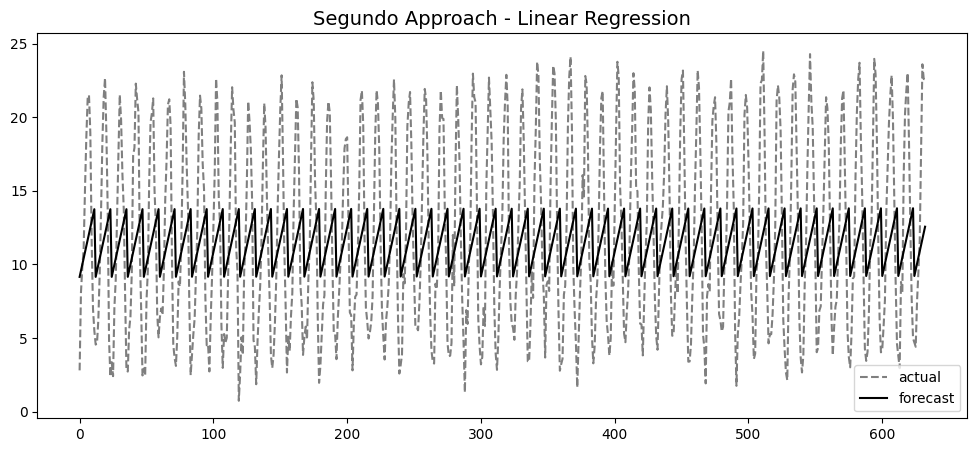

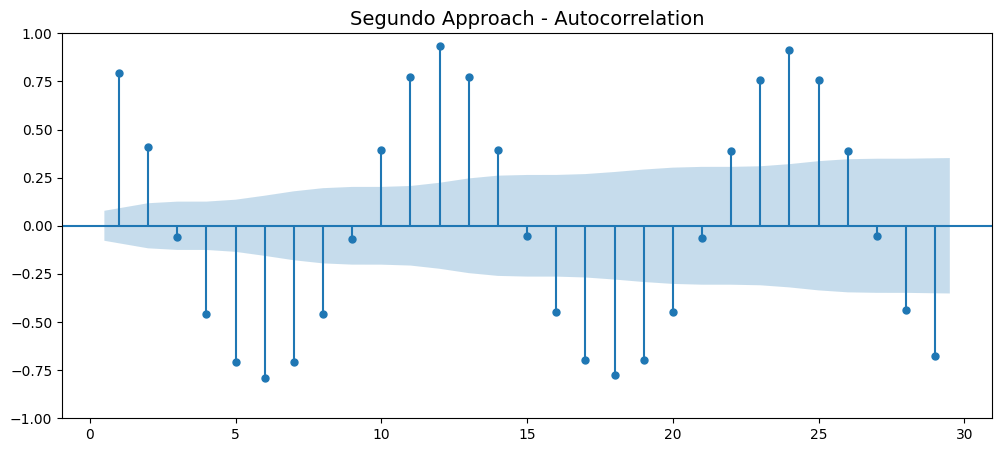

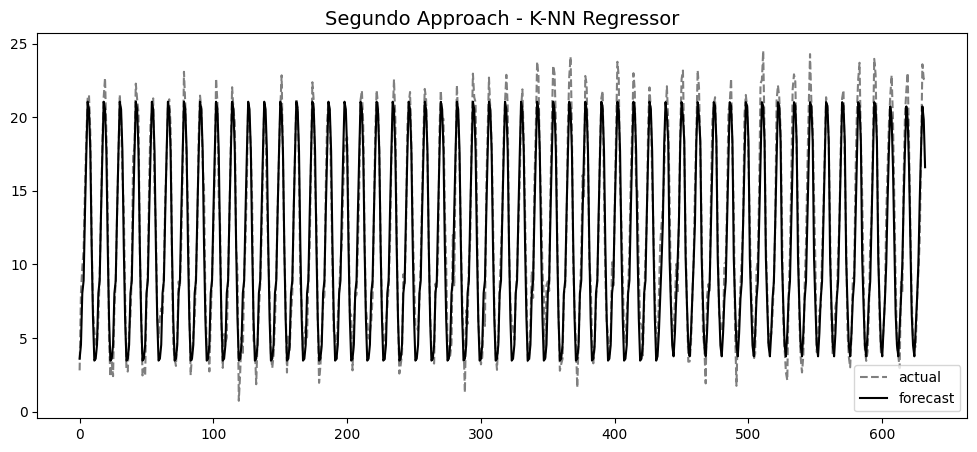

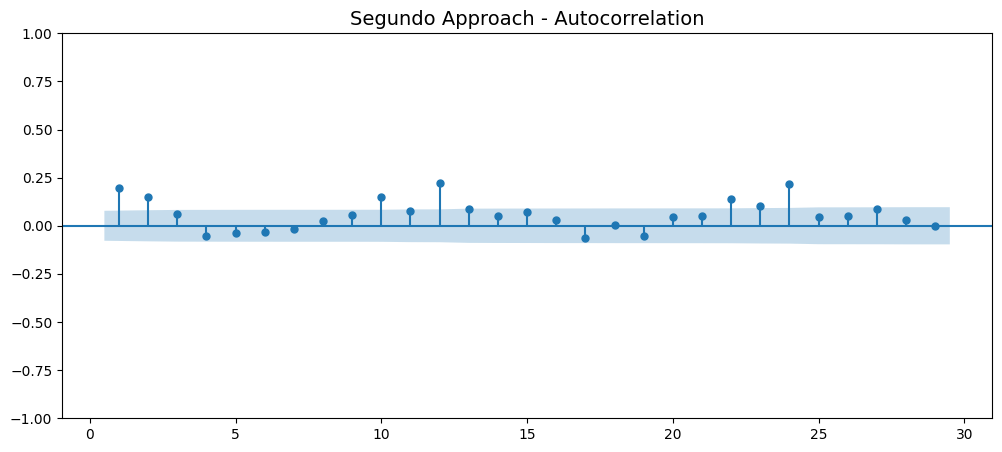

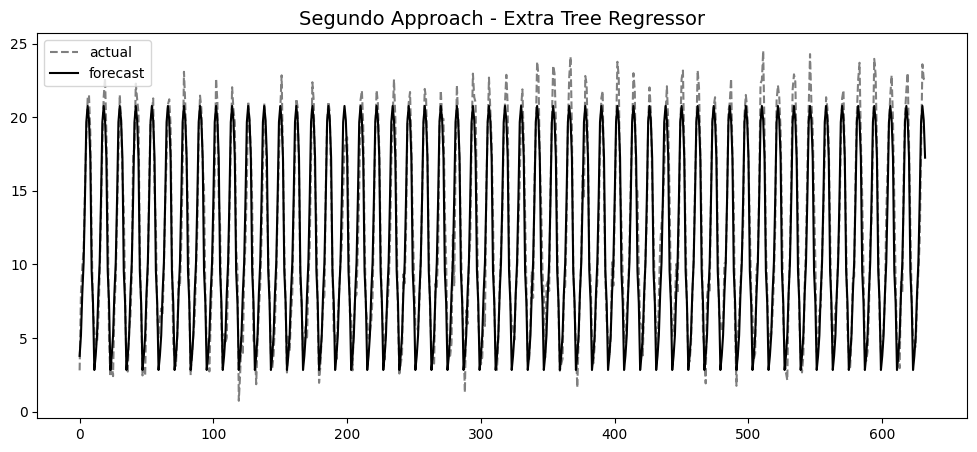

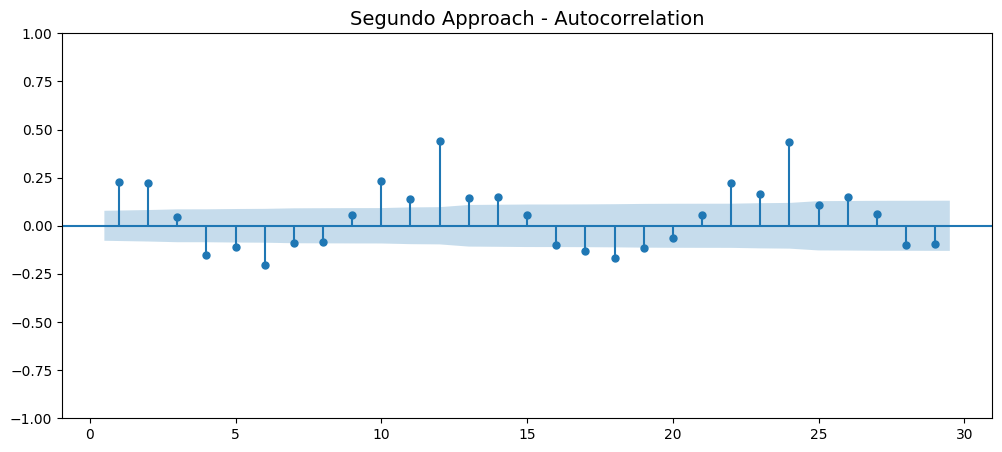

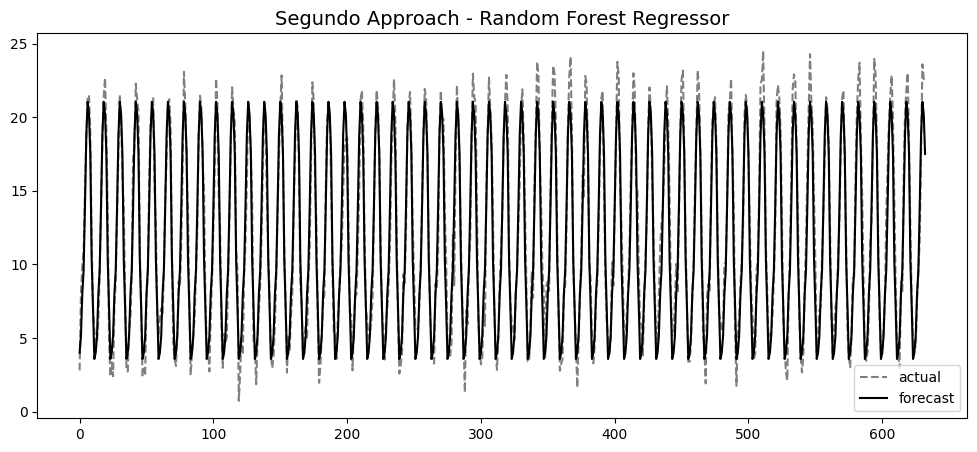

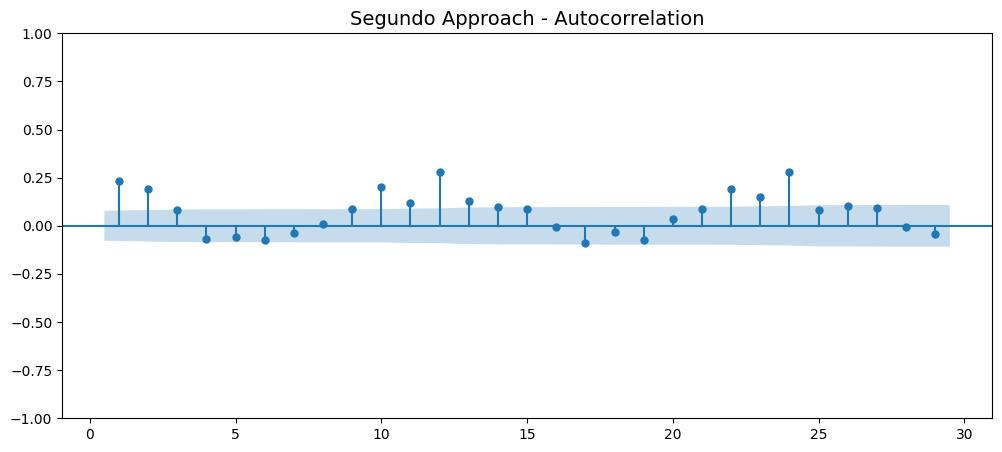

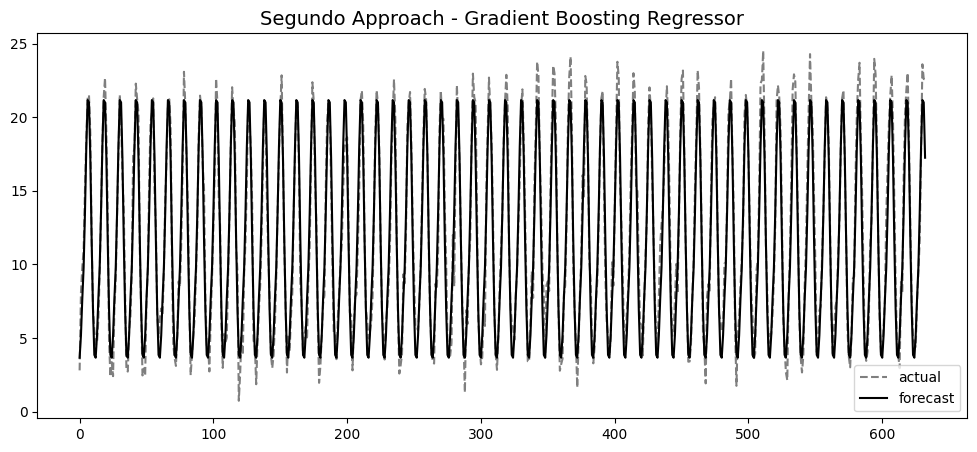

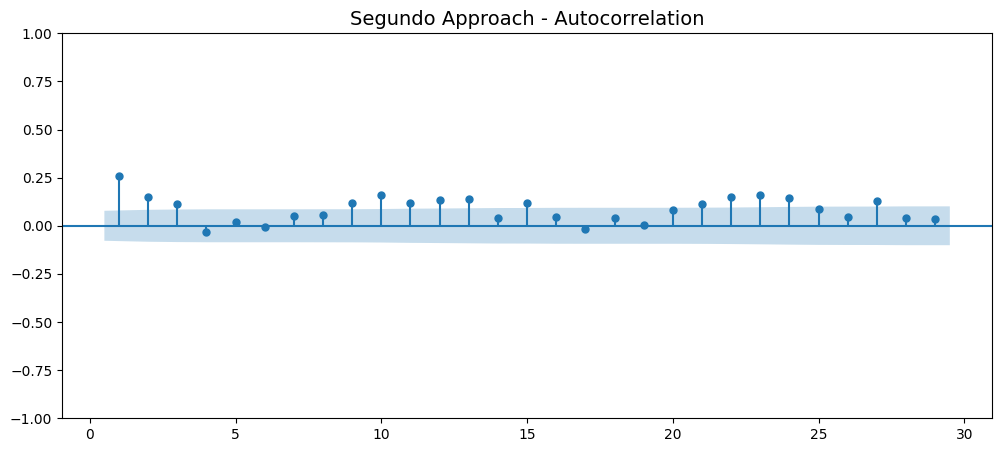

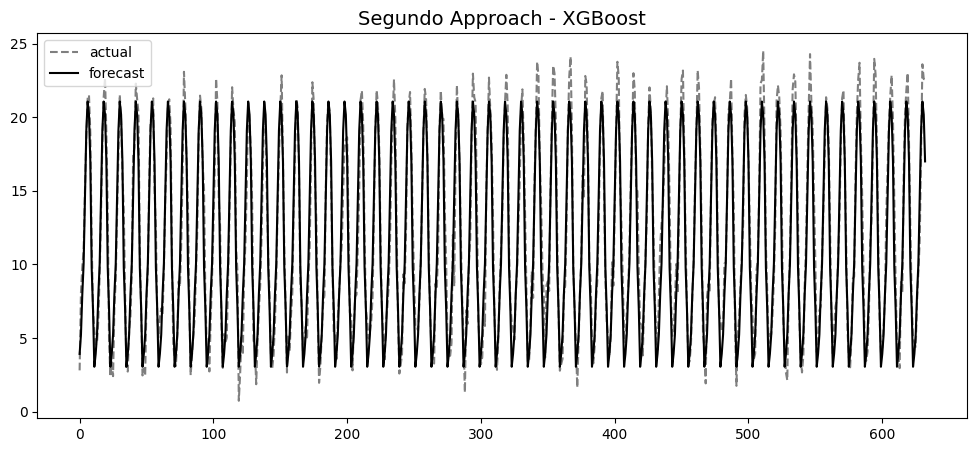

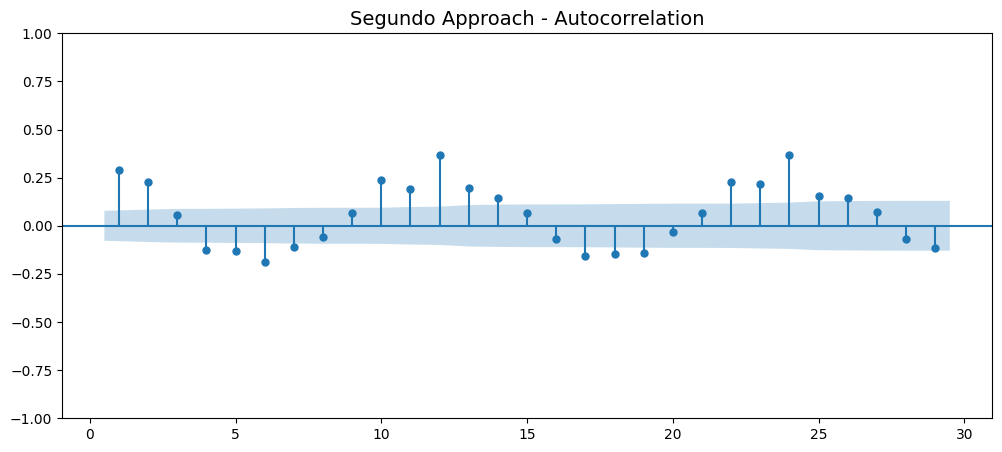

In [153]:
cols = ['yhat', 'resid', 'actual', 'Model Name']
plot_results(cols, dates_results, 'Segundo Approach')

### 3º Approach: Probar deseasonalizando antes de entrenar el modelo

El metodo de deseasonalizar es additive y no multiplicative, porque como se puede ver en el sarima la amplitud de las temperaturas se mantiene muy constante

In [154]:
from sklearn.model_selection import train_test_split

mad_train, mad_test = train_test_split(mad, train_size=0.8, shuffle=False)

In [155]:
#Modelo que realiza el entrenamiento de diversos modelos tras deseasonalizar
def make_forecast(data, test, n, regressor, window=24):
    fh = ForecastingHorizon(np.arange(n) + 1, is_relative=True)
    forecaster = [
            ("deseasonalize", Deseasonalizer(sp=12, model="additive")),
            ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1)))]
    if not isinstance(regressor, NaiveForecaster):
        reg = ("forecaster", make_reduction(
            regressor,
            strategy='recursive',
            window_length=window,
            scitype='tabular-regressor'))
        forecaster.append(reg)
        model = TransformedTargetForecaster(forecaster).fit(data.values)

    else:
        model = regressor.fit(data.values)

    predicted = pd.Series(
            model.predict(fh=fh).reshape(-1),
            index= test.index
                    )
    return predicted

In [156]:
#Lista de regressors importantes a probar
regressors = {
            'Naive Forecaster' : NaiveForecaster(strategy='mean', sp=12),
            'Linear Regression': LinearRegression(),
            'K-NN Regressor': KNeighborsRegressor(n_neighbors=5),
            'Extra Tree Regressor': ExtraTreesRegressor(),
            'Random Forest Regressor': RandomForestRegressor(),
            'Gradient Boosting Regressor': GradientBoostingRegressor(),
            'XGBoost': XGBRegressor()
            }

for k, reg in regressors.items():
    print(f'training {reg} ...')
    mad_test[k] = make_forecast(mad_train, mad_test, len(mad_test), regressor=reg , window=15)

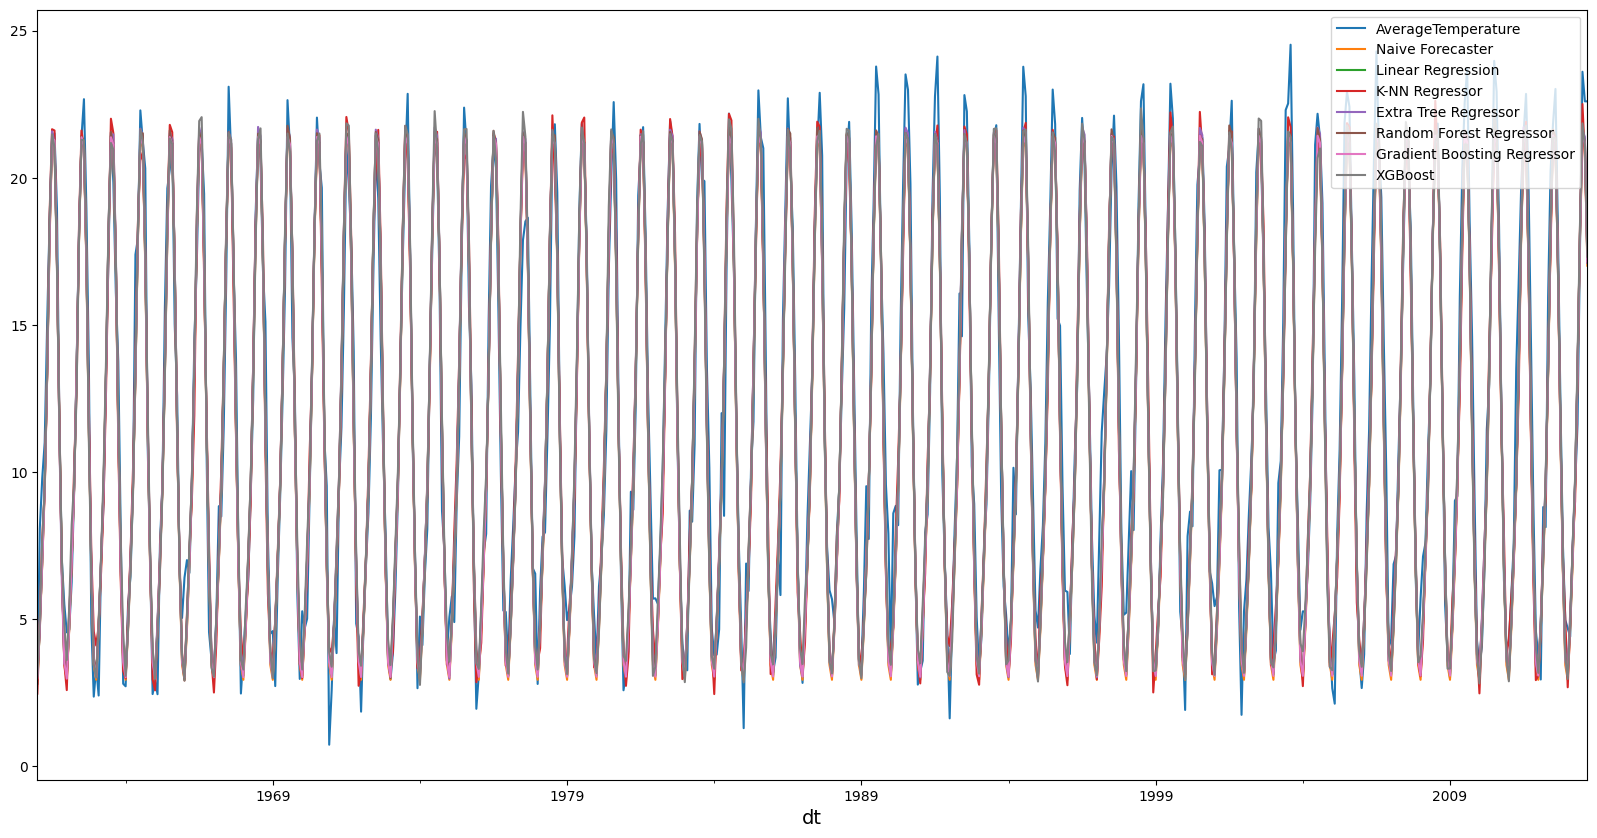

In [157]:
import matplotlib.pyplot as plt

mad_test.plot(subplots=False, figsize=(20, 10));plt.show()

In [170]:

def evaluate(df, train, sort_by='MASE'):
    evals = pd.DataFrame(index=['sMAPE', 'MAPE', 'RMSE'])
    y_truth = df['AverageTemperature']
    y_predicted = df.drop(columns=['AverageTemperature'])
    for p in y_predicted:
        evals.loc['sMAPE', p] = mape(y_truth, y_predicted[p])
        evals.loc['MAPE', p] = mape(y_truth, y_predicted[p])
        evals.loc['RMSE', p] = np.sqrt(mse(y_truth, y_predicted[p]))
        evals.loc['MASE', p] = mase(y_truth, y_predicted[p], y_train=train)
    return evals.T.sort_values(by=sort_by)

### Evaluar el tercer approach

In [171]:
evaluate(mad_test, mad_train)

sMAPE      MAPE      RMSE      MASE
Random Forest Regressor      0.147562  0.147562  1.523920  0.368967
Extra Tree Regressor         0.148135  0.148135  1.526104  0.371009
XGBoost                      0.150236  0.150236  1.534460  0.374530
Linear Regression            0.148365  0.148365  1.552101  0.376644
Gradient Boosting Regressor  0.149175  0.149175  1.566473  0.380559
Naive Forecaster             0.151746  0.151746  1.613840  0.392594
K-NN Regressor               0.158676  0.158676  1.605846  0.394164

### Comparacion de los 3 approach

Como se puede observar el tercer approach deseasonalizando los datos antes de entrenar el modelo es el que mejor resultados ofrece, y el mejor modelo haciendolo de esta manera es el random forest. Por lo tanto procedemos a realizar una hiperparametrizacion para buscar el mejor random forest

### Paso final: Optimizamos los hiperparametros del mejor modelo que es el RandomForest deseasonalizando

Para realizar esta parte he seguido de primeras el notebook chapter 12 pero me sale este error: /usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork(), y con este error no puedo entrenar el modelo, asi que voy a hacer el gridsearch con una lista de regressors manualmente

In [ ]:
from sklearn.model_selection import train_test_split

mad_train, mad_test = train_test_split(mad, train_size=0.8, shuffle=False)

In [ ]:
#Modelo que realiza el entrenamiento de diversos modelos tras deseasonalizar
def make_forecast(data, test, n, regressor, window=24):
    fh = ForecastingHorizon(np.arange(n) + 1, is_relative=True)
    forecaster = [
            ("deseasonalize", Deseasonalizer(sp=12, model="additive")),
            ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1)))]
    if not isinstance(regressor, NaiveForecaster):
        reg = ("forecaster", make_reduction(
            regressor,
            strategy='recursive',
            window_length=window,
            scitype='tabular-regressor'))
        forecaster.append(reg)
        model = TransformedTargetForecaster(forecaster).fit(data.values)

    else:
        model = regressor.fit(data.values)

    predicted = pd.Series(
            model.predict(fh=fh).reshape(-1),
            index= test.index
                    )
    return predicted

In [ ]:
#Lista de regressors importantes a probar
regressors = {
            'Random Forest Regressor 1': RandomForestRegressor(n_estimators=10, max_depth = None, min_samples_split = 2),
            'Random Forest Regressor 2': RandomForestRegressor(n_estimators=100, max_depth = None, min_samples_split = 2),
            'Random Forest Regressor 3': RandomForestRegressor(n_estimators=300, max_depth = None, min_samples_split = 2),
            'Random Forest Regressor 4': RandomForestRegressor(n_estimators=10, max_depth = 10, min_samples_split = 2),
            'Random Forest Regressor 5': RandomForestRegressor(n_estimators=100, max_depth = 10, min_samples_split = 2),
            'Random Forest Regressor 6': RandomForestRegressor(n_estimators=300, max_depth = 10, min_samples_split = 2),
            'Random Forest Regressor 7': RandomForestRegressor(n_estimators=10, max_depth = 30, min_samples_split = 2),
            'Random Forest Regressor 8': RandomForestRegressor(n_estimators=100, max_depth = 30, min_samples_split = 2),
            'Random Forest Regressor 9': RandomForestRegressor(n_estimators=300, max_depth = 30, min_samples_split = 2),
            'Random Forest Regressor 10': RandomForestRegressor(n_estimators=10, max_depth = None, min_samples_split = 10),
            'Random Forest Regressor 11': RandomForestRegressor(n_estimators=100, max_depth = None, min_samples_split = 10),
            'Random Forest Regressor 12': RandomForestRegressor(n_estimators=300, max_depth = None, min_samples_split = 10),
            'Random Forest Regressor 13': RandomForestRegressor(n_estimators=10, max_depth = 10, min_samples_split = 10),
            'Random Forest Regressor 14': RandomForestRegressor(n_estimators=100, max_depth = 10, min_samples_split = 10),
            'Random Forest Regressor 15': RandomForestRegressor(n_estimators=300, max_depth = 10, min_samples_split = 10),
            'Random Forest Regressor 16': RandomForestRegressor(n_estimators=10, max_depth = 30, min_samples_split = 10),
            'Random Forest Regressor 17': RandomForestRegressor(n_estimators=100, max_depth = 30, min_samples_split = 10),
            'Random Forest Regressor 18': RandomForestRegressor(n_estimators=300, max_depth = 30, min_samples_split = 10)
            }

for k, reg in regressors.items():
    print(f'training {reg} ...')
    mad_test[k] = make_forecast(mad_train, mad_test, len(mad_test), regressor=reg , window=15)

In [ ]:

def evaluate(df, train, sort_by='MASE'):
    evals = pd.DataFrame(index=['sMAPE', 'MAPE', 'RMSE'])
    y_truth = df['AverageTemperature']
    y_predicted = df.drop(columns=['AverageTemperature'])
    for p in y_predicted:
        evals.loc['sMAPE', p] = mape(y_truth, y_predicted[p], symmetric=True)
        evals.loc['MAPE', p] = mape(y_truth, y_predicted[p], symmetric=False)
        evals.loc['RMSE', p] = np.sqrt(mse(y_truth, y_predicted[p]))
        evals.loc['MASE', p] = mase(y_truth, y_predicted[p], y_train=train)
    return evals.T.sort_values(by=sort_by)

In [ ]:
evaluate(mad_test, mad_train)

sMAPE      MAPE      RMSE      MASE
Random Forest Regressor 12  0.138487  0.146299  1.495016  0.362124
Random Forest Regressor 2   0.138733  0.149001  1.493000  0.363361
Random Forest Regressor 16  0.141079  0.149657  1.507114  0.365605
Random Forest Regressor 9   0.141838  0.147167  1.520410  0.368565
Random Forest Regressor 11  0.143951  0.148283  1.536657  0.372207
Random Forest Regressor 8   0.143700  0.147579  1.536584  0.372232
Random Forest Regressor 18  0.144136  0.146926  1.544350  0.373622
Random Forest Regressor 13  0.145279  0.148223  1.547718  0.375688
Random Forest Regressor 3   0.145436  0.148586  1.547050  0.375769
Random Forest Regressor 1   0.145922  0.153836  1.548997  0.378402
Random Forest Regressor 5   0.147662  0.149048  1.565234  0.380254
Random Forest Regressor 10  0.147969  0.151899  1.560911  0.380597
Random Forest Regressor 15  0.149240  0.149708  1.577700  0.383308
Random Forest Regressor 4   0.149544  0.149719  1.579926  0.383908
Random Forest Regressor 6   0.149948  0.149965  1.582951  0.384714
Random Forest Regressor 14  0.150024  0.149975  1.584979  0.385134
Random Forest Regressor 17  0.150931  0.151049  1.591340  0.385653
Random Forest Regressor 7   0.152739  0.155502  1.593851  0.389414

## Evaluacion modelos machine learning

El mejor modelo es: RandomForestRegressor(n_estimators=300, max_depth = None, min_samples_split = 10) con el que se obtiene un 0.3621 de MASE en el test set

# Deep Learning

In [27]:
!pip install -U sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.1/130.1 kB 19.8 MB/s eta 0:00:00


In [28]:

from sklearn.ensemble import (RandomForestRegressor,
                              GradientBoostingRegressor,
                              ExtraTreesRegressor)


from sklearn.linear_model import( LinearRegression,
                                 ElasticNet,
                                 Ridge,
                                 Lasso,
                                 HuberRegressor)
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.all import (
        Deseasonalizer, Detrender,
        temporal_train_test_split,
        mean_absolute_percentage_error as mape,
        mean_squared_percentage_error as mspe,
        mean_squared_error as mse,
        mean_absolute_scaled_error as mase,
        ForecastingHorizon,
        NaiveForecaster,
        TransformedTargetForecaster,
        PolynomialTrendForecaster
)
from sktime.forecasting.compose import make_reduction
from xgboost import XGBRegressor


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

In [129]:
def plot_forecast(model, x_test, y_test, index, history):
    fig, ax = plt.subplots(2, 1)
    (pd.Series(history.history['loss'])
                      .plot(style='k',alpha=0.50, title='Loss by Epoch',
                            ax = ax[0], label='loss'))
    (pd.Series(history.history['val_loss'])
                      .plot(style='k',ax=ax[0],label='val_loss'))
    ax[0].legend()
    predicted = model.predict(x_test)
    pd.Series(y_test.reshape(-1),
              index=index).plot(style='k--', alpha=0.5, ax=ax[1],
                                title='Forecast vs Actual',
                                label='actual')
    pd.Series(predicted.reshape(-1),
              index=index).plot(
            style='k',label='Forecast', ax=ax[1])
    fig.tight_layout()
    ax[1].legend();plt.show()

In [23]:
def one_step_forecast(df, window):
    d = df.values
    x = []
    n = len(df)
    idx = df.index[:-window]
    for start in range(n-window):
        end = start + window
        x.append(d[start:end])
    cols = [f'x_{i}' for i in range(1, window+1)]
    x = np.array(x).reshape(n-window, -1)
    y = df.iloc[window:].values
    df_xs = pd.DataFrame(x, columns=cols, index=idx)
    df_y = pd.DataFrame(y.reshape(-1), columns=['y'], index=idx)
    return pd.concat([df_xs, df_y], axis=1).dropna()

mad_train_one = one_step_forecast(mad_train, 10)
mad_test_one = one_step_forecast(mad_test, 10)

X_train = mad_train_one.iloc[:,:-1]
X_test = mad_test_one.iloc[:,:-1]

y_train = mad_train_one["y"]
y_test = mad_test_one["y"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [24]:
X_train_3 = np.array(X_train_sc).reshape(X_train_sc.shape[0], X_train_sc.shape[1], 1)
X_test_3 = np.array(X_test_sc).reshape(X_test_sc.shape[0], X_test_sc.shape[1], 1)

## RNN + Dense

In [134]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Create a simple DNN model
model = tf.keras.Sequential([
    SimpleRNN(32, return_sequences=True, input_shape=(X_train_3.shape[1],X_train_3.shape[2])),
    Dropout(0.2),
    SimpleRNN(32, return_sequences=False),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer (single value prediction)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model with your time series data
history = model.fit(X_train_3, y_train, epochs=100, batch_size=32, validation_data = (X_test_3, y_test), callbacks=[early_stopping])


In [29]:
yhat = model.predict(X_test_3)
mase_test = mase(y_test, yhat, y_train=y_train)
mase_test

0.5012663835723032

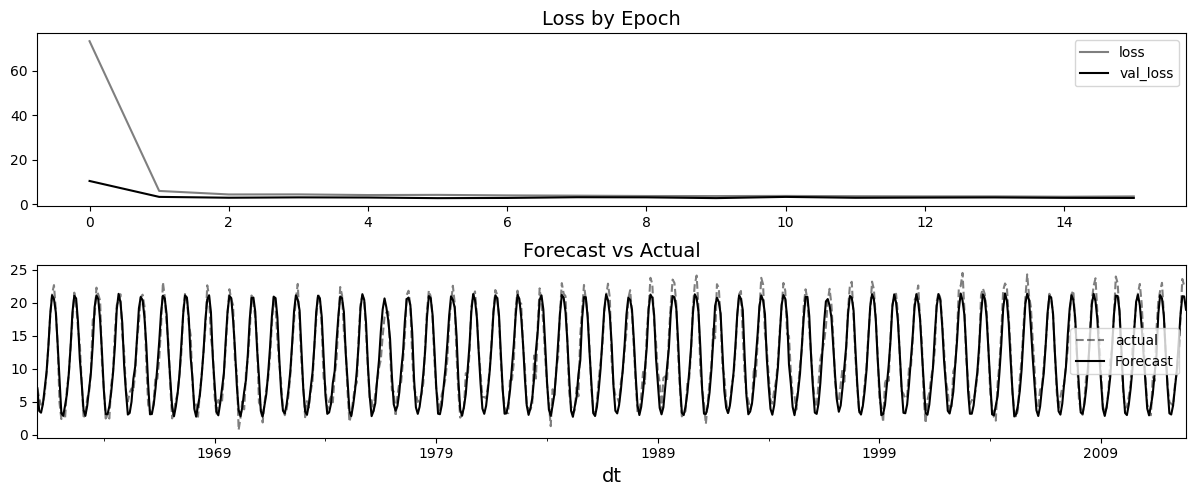

In [135]:
plot_forecast(model, X_test_3, np.array(y_test), mad_test_one.index, history)

## LSTMS + Dense

In [132]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Create a simple DNN model
model = tf.keras.Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_3.shape[1],X_train_3.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer (single value prediction)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model with your time series data
history = model.fit(X_train_3, y_train, epochs=100, batch_size=32, validation_data = (X_test_3, y_test), callbacks=[early_stopping])


In [74]:
yhat = model.predict(X_test_3)
mase_test = mase(y_test, yhat, y_train=y_train)
mase_test

0.40530336455059507

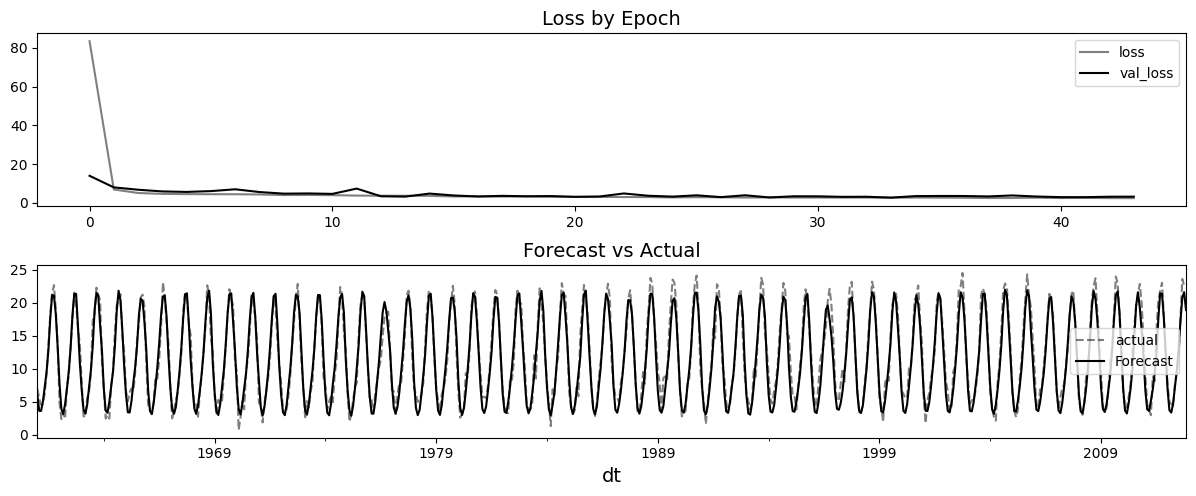

In [133]:
plot_forecast(model, X_test_3, np.array(y_test), mad_test_one.index, history)

## GRU + Dense

In [130]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Create a simple DNN model
model = tf.keras.Sequential([
    GRU(units = 64, return_sequences = False, input_shape=(10,1)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer (single value prediction)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model with your time series data
history = model.fit(X_train_3, y_train, epochs=100, batch_size=32, validation_data = (X_test_3, y_test), callbacks=[early_stopping])


In [76]:
yhat = model.predict(X_test_3)
mase_test = mase(y_test, yhat, y_train=y_train)
mase_test

0.3918635749504237

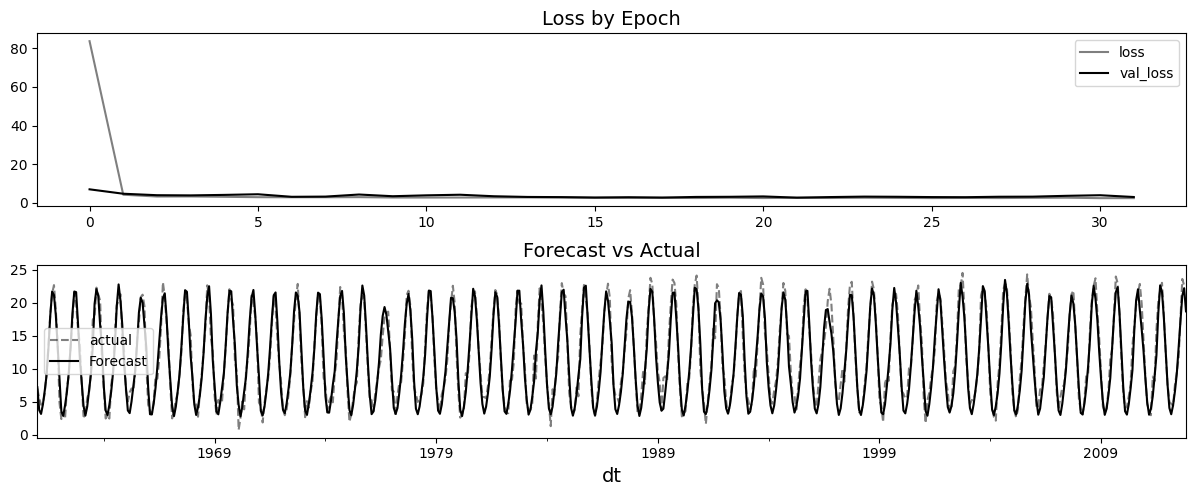

In [131]:
plot_forecast(model, X_test_3, np.array(y_test), mad_test_one.index, history)

## GRU + LSTM + Dense

In [116]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Create a simple DNN model
model = tf.keras.Sequential([
    GRU(units = 64, return_sequences = True, input_shape=(10,1)),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(64, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer (single value prediction)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model with your time series data
history = model.fit(X_train_3, y_train, epochs=100, batch_size=32, validation_data = (X_test_3, y_test), callbacks=[early_stopping])


In [84]:
yhat = model.predict(X_test_3)
mase_test = mase(y_test, yhat, y_train=y_train)
mase_test

0.3764623506032088

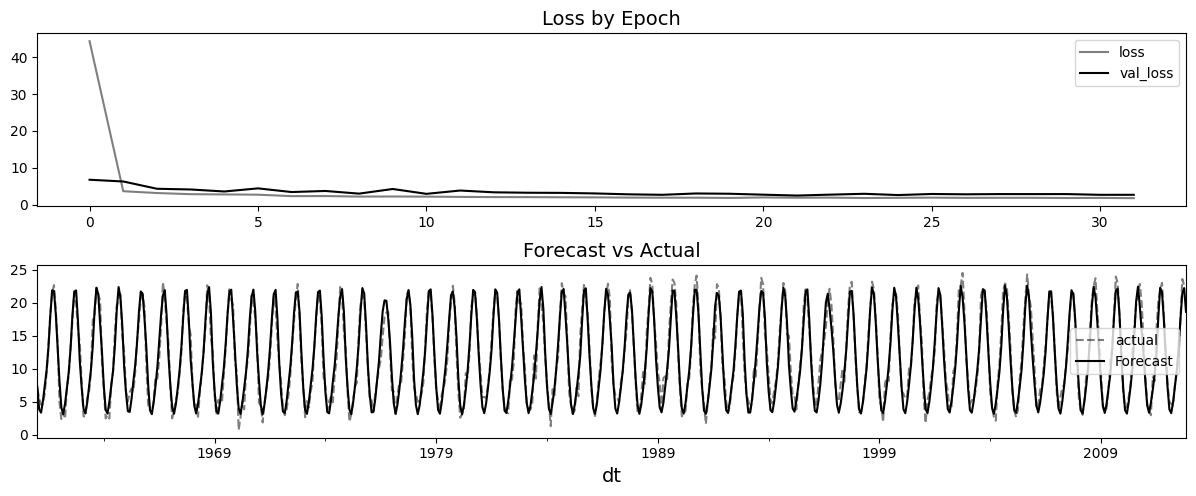

In [128]:
plot_forecast(model, X_test_3, np.array(y_test), mad_test_one.index, history)

## Evaluacion modelos Deep Learning

Como se puede ver por los resultados de MASE de cada uno de los modelos entrenados, el mejor modelo es el que combina las capas GRU, LSTM, RNN y Dense para obtener un 0.3765 de MASE en el test set.

Y esto se refleja en la grafica de forecast que es el que mejor capta esos extremos de temperatura

# El mejor modelo para prediccion de temperaturas

Para comparar los 3 modelos diferentes me voy a basar en la metrica MASE ya que mirar diferentes metricas puede llevar a indecision, y mas si tenemos en cuenta que el rendimiento de los 3 modelos es muy similar.

El mejor modelo de "baseline" es un SARIMAX que proporciona un 0.3622 de MASE en el test set

El mejor modelo de Machine Learning es: RandomForestRegressor(n_estimators=300, max_depth = None, min_samples_split = 10) con el que se obtiene un 0.3621 de MASE en el test set. Usando el deseasonalizer (aditivo ya que la amplitud no aumenta) y el detrend para el procesamiento de los datos

El mejor modelo de Deep Learning es el que combina las capas GRU, LSTM, RNN y Dense: model =

tf.keras.Sequential([
    GRU(units = 64, return_sequences = True, input_shape=(10,1)),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(64, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer (single value prediction)
])


 para obtener un 0.3765 de MASE en el test set. Y en el procesamiento incluye el one_step_forecast para construir 10 columnas de entrenamiento con las temperaturas de dias anteriores

En los 3 tipos de modelos hay modelos que tienen mejor y peor rendimiento, pero si comparamos unicamente los que mejor rendimiento tienen de los 3, vemos que los 3 tienen forecasts muy similares (forecast de cada modelo disponible donde se ha entrenado) y esto se refleja en los valores de rendimiento como MASE, que son casi identicos

# El mejor modelo entre baseline, Machine Learning y Deep Learning para el analisis del GlobalLandTemperaturesByMajorCity.csv es de Machine Learning (RandomForest usando Deseasonalizer y Detrend) con un 0.3621 de MASE